# Test if robosuite can be successfully import

In [1]:
import robosuite
import numpy as np, imageio

# Initialize environments with robosuite

In [32]:
options = {}
options["env_name"] = "Lift"
options["controller_configs"] = robosuite.load_controller_config(default_controller="OSC_POSE")
options["robots"] = "Panda"

env = robosuite.make(
    **options,
    has_renderer=False,
    has_offscreen_renderer=True,
    ignore_done=True,
    use_camera_obs=True,
    horizon=1000,
    control_freq=20,
    camera_names=["agentview", "robot0_eye_in_hand", "frontview"]
)


# Reset the environment and control the robots through API

In [25]:
obs = env.reset()

Check the image observation (Showing both agentview image and eye in hand image)


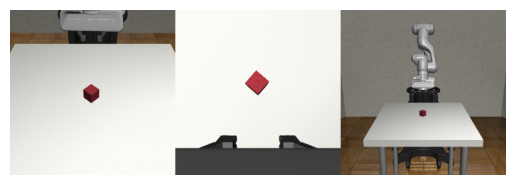

In [29]:
from matplotlib import pyplot as plt
# We need to invert the numpy array because of matplotlib visualization convention
plt.imshow(np.concatenate((obs["agentview_image"][::-1], obs["robot0_eye_in_hand_image"][::-1],
                           obs['frontview_image'][::-1]), axis=1))
plt.axis("off")
plt.show()

See what an observation contains

In [37]:
print(obs.keys())
print(env.action_dim)

odict_keys(['robot0_joint_pos_cos', 'robot0_joint_pos_sin', 'robot0_joint_vel', 'robot0_eef_pos', 'robot0_eef_quat', 'robot0_gripper_qpos', 'robot0_gripper_qvel', 'agentview_image', 'robot0_eye_in_hand_image', 'frontview_image', 'cube_pos', 'cube_quat', 'gripper_to_cube_pos', 'robot0_proprio-state', 'object-state'])
7


Example control wth random OSC_POSE actions. Each OSC_POSE action contains 7 dimensions, 6 arm + 1 gripper

In [39]:
images = []
for _ in range(100):
  obs, reward, done, _ = env.step(np.random.randn(7))
  images.append(obs["frontview_image"][::-1])

Visualize the video

In [40]:
%matplotlib inline

writer = imageio.get_writer('output.mp4', fps=20)
for image in images:
  writer.append_data(image)
writer.close()

from IPython.display import HTML
from base64 import b64encode
mp4 = open('output.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)